In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create dummy dataset
years =np.repeat(np.arange(2010, 2022), 100)
df = pd.DataFrame(years, columns=['years'])
df['Value'] = np.random.randint(1, 10, len(df)) 
df['Value'] = df['Value'] * df['years'] / 100

# Bin values
df['Bins'] = pd.cut(df['Value'], 5)

df.head()

,years,Value,Bins
0,2010,100.5,"(84.816, 117.174]"
1,2010,40.2,"(19.938, 52.458]"
2,2010,20.1,"(19.938, 52.458]"
3,2010,20.1,"(19.938, 52.458]"
4,2010,100.5,"(84.816, 117.174]"


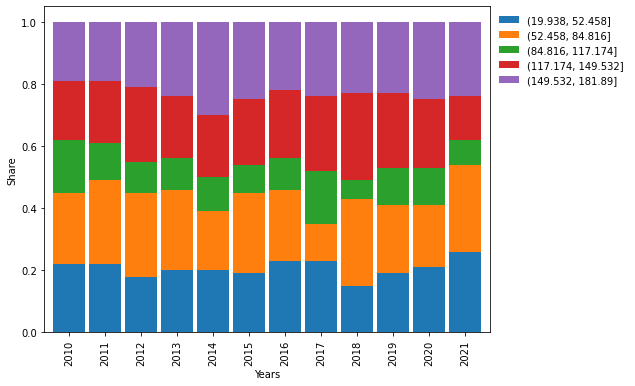

In [3]:
# Create binning
cross_tab = pd.crosstab(index=df['years'],
                        columns=df['Bins'],
                        normalize="index")

# Create graph
cross_tab.plot(kind='bar', 
                    stacked=True, 
                    figsize=(8, 6),
                    width=0.9)
plt.style.use('ggplot')
plt.legend(loc="upper left", 
           bbox_to_anchor=(1, 1), 
           frameon=False)
plt.xlabel("Years")
plt.ylabel("Share")
plt.show()

In [4]:
# insert nans at random locations
df['value1_obs'] = df['Value']
df['value2_obs'] = df['Value']
df['value3_obs'] = df['Value']
df.loc[np.random.randint(0, len(df), 30), 'value1_obs'] = np.nan
df.loc[np.random.randint(0, len(df), 10), 'value2_obs'] = np.nan
df.loc[np.random.randint(0, len(df), 200), 'value3_obs'] = np.nan

# Calculate completeness
df2 = df.groupby('years').agg({'value1_obs': lambda x: x.isnull().mean(),
                         'value2_obs': lambda x: x.isnull().mean(),
                         'value3_obs': lambda x: x.isnull().mean()})

# Show results
(df2.style.format({"value1_obs": "{:20,.2%}", 
                          "value2_obs": "{:20,.2%}", 
                          "value3_obs": "{:20,.2%}"})
                .background_gradient(cmap='RdYlGn_r'))

,value1_obs,value2_obs,value3_obs
years,,,
2010,2.00%,1.00%,16.00%
2011,4.00%,1.00%,17.00%
2012,1.00%,0.00%,11.00%
2013,1.00%,1.00%,20.00%
2014,0.00%,1.00%,22.00%
2015,3.00%,1.00%,14.00%
2016,3.00%,3.00%,15.00%
2017,1.00%,1.00%,11.00%
2018,6.00%,0.00%,14.00%
